#### Loading loan Dataset into a dataframe

In [210]:

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 

* Load 'loan.csv' into a dataframe

In [211]:
df = pd.read_csv('loan/loan.csv')
df.shape

(39717, 111)

In [212]:
# As this dataset has 111 columns resetting max_columns to be displayed as 150
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 200)
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Clean Data

In [213]:
## Determine cols having all null values
cols_having_all_nulls = [col for col in df.columns if df[col].isna().sum() == len(df)]
print(cols_having_all_nulls)
len(cols_having_all_nulls)

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

54

In [214]:
## Drop all cols determined above
df = df.drop(cols_having_all_nulls, axis=1)
df.shape

(39717, 57)

In [215]:
df.info()
# Initial look at the dataset there are approximately 24 columns with object type
# Will need to verify the if object type columns need a datatype correction

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### As there are 39717 rows, For columns where the amount of the null/NAN values are insignificant, simply remove those rows having these columns values as null/NAN


In [216]:
# Drop rows where the number of null values are insignificant
df = df[~df.chargeoff_within_12_mths.isna()]
df = df[~df.last_credit_pull_d.isna()]
df = df[~df.tax_liens.isna()]
df = df[~df.collections_12_mths_ex_med.isna()]
df = df[~df.revol_util.isna()]
df = df[~df.last_pymnt_d.isna()]
df = df[~df.pub_rec_bankruptcies.isna()]
df = df[~df.title.isna()]
df = df[~df.emp_title.isna()]
df = df[~df.emp_length.isna()]
df.shape
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12025
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

###  ***Drop un-required and unique Columns***
* Determine columns to be dropped:
    * next_pymnt_d as more than 90% of the values seems to NAN
    * mths_since_last_record as it has as more than 90% of the values seems to NAN

In [217]:
def drop_cols():
    # Dropping next_pymnt_d and mths_since_last_record as they are having more than 90$ values as NAN
    del df['next_pymnt_d']
    del df['mths_since_last_record']
    # Dropping purpose, desc, title as they dont really contribute to the EDA
    del df['purpose']
    del df['desc']
    del df['title']

drop_cols()

In [218]:
# Determines and drops columns which have all unique values
def drop_unique_cols():
    uniq_cols = [col for col in df.columns if df[col].nunique() == len(df.index)]
    print("Columns having all unique : ", uniq_cols)
    for cols in uniq_cols:
        del df[cols]

# Determines and drops columns having only 1 unique value
def drop_cols_having_only_1_unqiue_value():
    cols_having_only_1_unqiue_value = [col for col in df.columns if df[col].nunique() == 1]
    print("Columns having only 1 unique values: ", cols_having_only_1_unqiue_value)
    for cols in cols_having_only_1_unqiue_value:
        del df[cols]

drop_unique_cols()
drop_cols_having_only_1_unqiue_value()

Columns having all unique :  ['id', 'member_id', 'url']
Columns having only 1 unique values:  ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [219]:
mths_since_last_delinq_median = df.mths_since_last_delinq.median()
df.mths_since_last_delinq = df['mths_since_last_delinq'].fillna(mths_since_last_delinq_median)
df.mths_since_last_delinq.describe()


count    36431.000000
mean        35.723587
std         12.565155
min          0.000000
25%         35.000000
50%         35.000000
75%         35.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

## Fix Columns Values and Data Types

In [220]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,309xx,GA,1.00,0,Apr-99,5,35.0,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,852xx,AZ,11.20,0,Nov-04,3,35.0,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,280xx,NC,23.51,0,Jul-05,1,35.0,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


### Fix column values

In [221]:
def fix_column_values():
    ## Trim the ' months' from the value from term column 
    df.term.value_counts(dropna=False)
    df.term = df.term.apply(lambda x : x.replace(" months", ""))

    # Trim '%' from the int_rate column*
    df.int_rate.value_counts(dropna=False)
    df.int_rate = df.int_rate.apply(lambda x : x.replace("%", ""))

    # Replace "< ", " year", " years", "+ years" with ""
    df.emp_length.value_counts(dropna=False)
    df.emp_length = df.emp_length.apply(lambda x: x.replace("< ", "").replace("+ years", "").replace(" years", "").replace(" year",""))

fix_column_values()
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,309xx,GA,1.00,0,Apr-99,5,35.0,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,852xx,AZ,11.20,0,Nov-04,3,35.0,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,280xx,NC,23.51,0,Jul-05,1,35.0,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


* *Rename columns*
    * Rename 'term' to 'term_in_months'

In [222]:
df = df.rename(columns={"term" : "term_in_months"})

#### ***Correct columns datatypes***
     * Change term_in_months, emp_length to int
     * Change int_rate, funded_amnt, loan_amnt to float

In [223]:
df = df.astype({"term_in_months": int, "int_rate": float, "loan_amnt": float, "funded_amnt": float, "funded_amnt_inv": float, "emp_length": int, "annual_inc": float})
# df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y')
# df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')

### Derive columns

In [224]:
df.loan_status.value_counts()

Fully Paid     30423
Charged Off     4942
Current         1066
Name: loan_status, dtype: int64

In [225]:
df['issue_y'] = pd.DatetimeIndex(df.issue_d).year
df['issue_m'] = pd.DatetimeIndex(df.issue_d).month

# Convert loan_status into a numerical variable
df = df[df.loan_status != "Current"]
df['defaulted'] = df.loan_status.apply(lambda x: 1 if (x == "Charged Off") else 0) 
df.defaulted.value_counts()

0    30423
1     4942
Name: defaulted, dtype: int64

### Drop duplicates if any

In [226]:
## Drop duplicates if there are any
df.drop_duplicates()
df.shape

(35365, 43)

### Univariate and bivariate analysis

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

### Remove outliers and create categorical variables

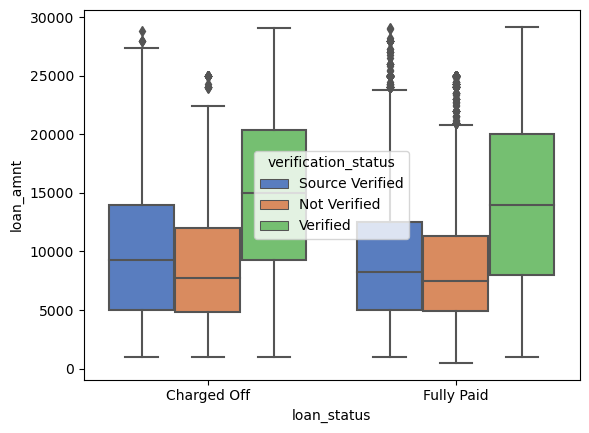

In [228]:
# Remove outliers using IQR for loan amount
loan_amnt_iqr = df.loan_amnt.quantile(0.75) - df.loan_amnt.quantile(0.25)
loan_amnt_lower_bound = df.loan_amnt.quantile(0.25) - 1.5*loan_amnt_iqr
loan_amnt_upper_bound = df.loan_amnt.quantile(0.75) + 1.5*loan_amnt_iqr

df = df[(df.loan_amnt >= loan_amnt_lower_bound) & (df.loan_amnt <= loan_amnt_upper_bound)]
sns.boxplot(y="loan_amnt", x="loan_status", palette="muted", hue="verification_status", data=df)
plt.show()

loan_amt_25_quantile = int(df.loan_amnt.quantile(0.25))
loan_amt_50_quantile = int(df.loan_amnt.quantile(0.5))
loan_amt_75_quantile = int(df.loan_amnt.quantile(0.75))  

# Convert loan amount into a categorical variable for further analysis
def binning_loan_amnt(loan_amnt):  
    if (loan_amnt <= loan_amt_25_quantile):
        return "0-{}".format(loan_amt_25_quantile)
    if (loan_amnt > loan_amt_25_quantile and loan_amnt <= loan_amt_50_quantile):
        return "{}-{}".format(loan_amt_25_quantile, loan_amt_50_quantile)
    if (loan_amnt > loan_amt_50_quantile and loan_amnt <= loan_amt_75_quantile):
        return "{}-{}".format(loan_amt_50_quantile, loan_amt_75_quantile)
    return ">{}".format(loan_amt_75_quantile)

df['loan_amnt_category'] = df.loan_amnt.apply(binning_loan_amnt)


#### From the above plot an individual verified and asking for higher loan amount has higher likelihood of defaulting

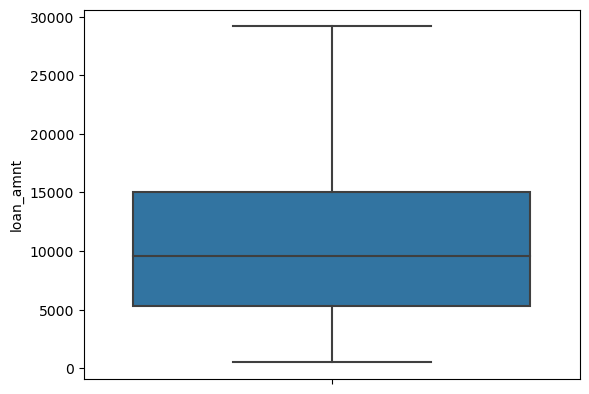

count    34357.000000
mean     10491.828448
std       6376.313976
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      29175.000000
Name: loan_amnt, dtype: float64

In [229]:
sns.boxplot(y="loan_amnt", data=df)
plt.show()
df.loan_amnt.describe()

#### 50% of folks ask for around ~9000 as loan amount

count    34184.000000
mean      9749.991920
std       5965.365664
min          0.000000
25%       5000.000000
50%       8675.000000
75%      13575.000000
max      26814.098160
Name: funded_amnt_inv, dtype: float64

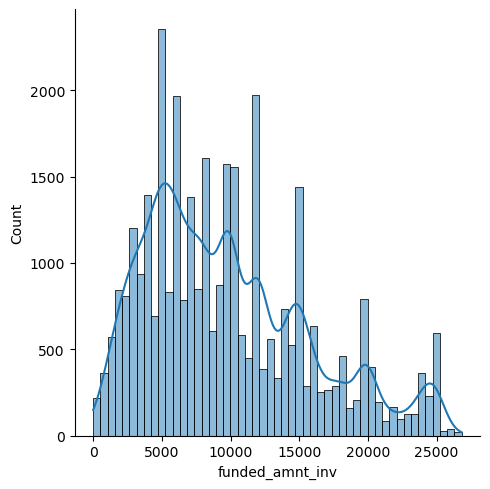

In [230]:
# Remove outliers using IQR for funded amount invested
funded_amnt_inv_iqr = df.funded_amnt_inv.quantile(0.75) - df.funded_amnt_inv.quantile(0.25)
funded_amnt_inv_lower_bound = df.funded_amnt_inv.quantile(0.25) - 1.5*funded_amnt_inv_iqr
funded_amnt_inv_upper_bound = df.funded_amnt_inv.quantile(0.75) + 1.5*funded_amnt_inv_iqr

df = df[(df.funded_amnt_inv >= funded_amnt_inv_lower_bound) & (df.funded_amnt_inv <= funded_amnt_inv_upper_bound)]
sns.displot(df, x="funded_amnt_inv", kde = True)

funded_amnt_inv_25_quantile = int(df.funded_amnt_inv.quantile(0.25))
funded_amnt_inv_50_quantile = int(df.funded_amnt_inv.quantile(0.5))
funded_amnt_inv_75_quantile = int(df.funded_amnt_inv.quantile(0.75)) 

# Convert funded amount invested into a categorical variable for further analysis
def binning_funded_amnt_inv(funded_amnt_inv):  
    if (funded_amnt_inv <= funded_amnt_inv_25_quantile):
        return "0-{}".format(funded_amnt_inv_25_quantile)
    if (funded_amnt_inv > funded_amnt_inv_25_quantile and funded_amnt_inv <= funded_amnt_inv_50_quantile):
        return "{}-{}".format(funded_amnt_inv_25_quantile, funded_amnt_inv_50_quantile)
    if (funded_amnt_inv > funded_amnt_inv_50_quantile and funded_amnt_inv <= funded_amnt_inv_75_quantile):
        return "{}-{}".format(funded_amnt_inv_50_quantile, funded_amnt_inv_75_quantile)
    return ">{}".format(funded_amnt_inv_75_quantile)

df['funded_amnt_inv_category'] = df.funded_amnt_inv.apply(binning_funded_amnt_inv)
df.funded_amnt_inv.describe()

<Axes: xlabel='loan_status', ylabel='funded_amnt_inv'>

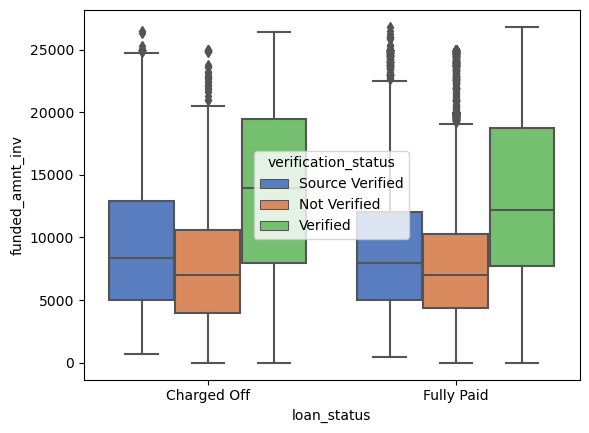

In [231]:
sns.boxplot(y="funded_amnt_inv", x="loan_status", palette="muted", hue="verification_status", data=df)

#### From the above plots its evident that loan amount asked for and loan amount funded by investors at around multiples of 5000(5000, 10000, 12500, 15000, 20000, 25000) and 50% of folks are disbursed loan amount at around 8200

#### Verification status seems to have no impact wether the loan would be defaulted

count     32602.000000
mean      60304.738173
std       26643.383667
min        4000.000000
25%       40000.000000
50%       55400.000000
75%       75893.250000
max      139200.000000
Name: annual_inc, dtype: float64

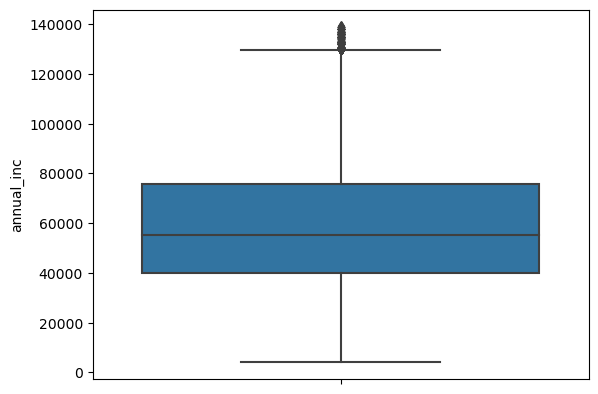

In [232]:
# Remove outliers 
annual_inc_iqr = df.annual_inc.quantile(0.75) - df.annual_inc.quantile(0.25)
annual_inc_lower_bound = df.annual_inc.quantile(0.25) - 1.5*annual_inc_iqr
annual_inc_upper_bound = df.annual_inc.quantile(0.75) + 1.5*annual_inc_iqr

df = df[(df.annual_inc >= annual_inc_lower_bound) & (df.annual_inc <= annual_inc_upper_bound)]
sns.boxplot(y="annual_inc", data=df)

annual_inc_25_quantile = int(df.annual_inc.quantile(0.25))
annual_inc_50_quantile = int(df.annual_inc.quantile(0.5))
annual_inc_75_quantile = int(df.annual_inc.quantile(0.75))  

# Convert annual income into a categorical variable for further analysis
def binning_annual_inc(annual_inc):  
    if (annual_inc <= annual_inc_25_quantile):
        return "0-{}".format(annual_inc_25_quantile)
    if (annual_inc > annual_inc_25_quantile and annual_inc <= annual_inc_50_quantile):
        return "{}-{}".format(annual_inc_25_quantile, annual_inc_50_quantile)
    if (annual_inc > annual_inc_50_quantile and annual_inc <= annual_inc_75_quantile):
        return "{}-{}".format(annual_inc_50_quantile, annual_inc_75_quantile)
    return ">{}".format(annual_inc_75_quantile)

df['annual_inc_category'] = df.annual_inc.apply(binning_annual_inc)
df.annual_inc_category.value_counts()
df.annual_inc.describe()

#### A lot of folks annual income lies between ~40K - 70K

In [233]:
# Convert dti into a categorical variable
def dti_bucketing(dti):
    if (dti <= 8):
        return 'VERY LOW'
    if (dti > 8 and dti <=13):
        return 'LOW'
    if (dti > 13 and dti <=17):
        return 'MEDIUM'
    if (dti >= 17 and dti < 19):
        return 'HIGH'
    return 'VERY HIGH'
df['dti_bucket'] = df.dti.apply(dti_bucketing)
df.dti_bucket.value_counts()

VERY HIGH    7887
LOW          7632
VERY LOW     7497
MEDIUM       6637
HIGH         2949
Name: dti_bucket, dtype: int64

count    32548.000000
mean        11.818768
std          3.586414
min          5.420000
25%          8.900000
50%         11.710000
75%         14.270000
max         22.110000
Name: int_rate, dtype: float64

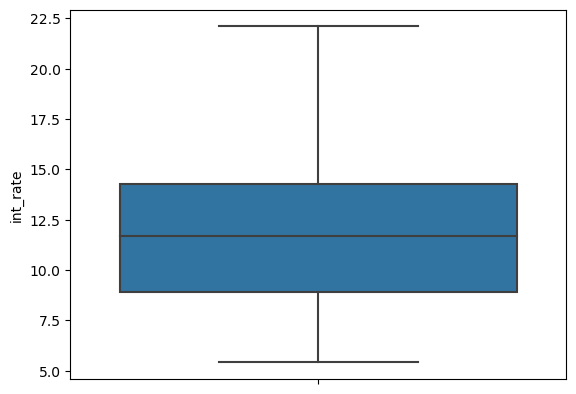

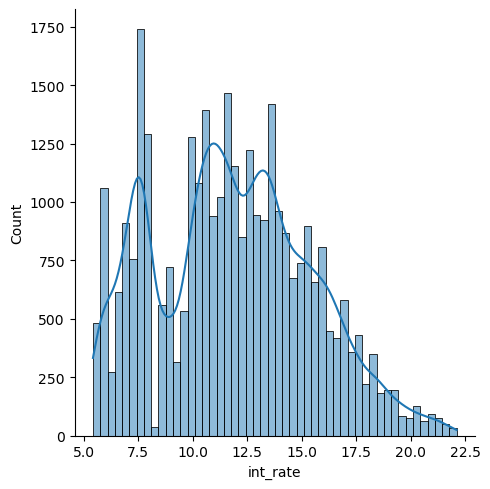

In [234]:
# Remove outliers
int_rate_iqr = df.int_rate.quantile(0.75) - df.int_rate.quantile(0.25)
int_rate_lower_bound = df.int_rate.quantile(0.25) - 1.5*int_rate_iqr
int_rate_upper_bound = df.int_rate.quantile(0.75) + 1.5*int_rate_iqr

df = df[(df.int_rate >= int_rate_lower_bound) & (df.int_rate <= int_rate_upper_bound)]
sns.boxplot(y="int_rate", data=df)
sns.displot(df, x="int_rate", kde = True)

int_rate_25_quantile = int(df.int_rate.quantile(0.25))
int_rate_50_quantile = int(df.int_rate.quantile(0.5))
int_rate_75_quantile = int(df.int_rate.quantile(0.75))

# Convert interest rate into categorical variable:
def bin_int_rate(int_rate):
    if(int_rate <= int_rate_25_quantile):
        return "LOW"
    if(int_rate > int_rate_25_quantile and int_rate <= int_rate_50_quantile):
        return "MEDIUM"
    if(int_rate > int_rate_50_quantile and int_rate <= int_rate_75_quantile):
        return "HIGH"
    return "VERY HIGH"

df['int_rates_bucket'] = df.int_rate.apply(bin_int_rate)
df.int_rate.describe()

* A lot of folks are issued interest at ~8% and betwen (10 - 14.5)% 
* Very less people are issued interest between (8-10)%
* 50% of foks are issued loan at interest rate ~11.5%

In [235]:
df.dti.corr(df.defaulted)*100

4.158530769795518

In [236]:
df.loan_amnt.corr(df.defaulted)*100

5.339187287714525

In [237]:
round(df.annual_inc.corr(df.defaulted)*100, 2)

-7.31

In [238]:

df['home_ownership_perc'] = (df.defaulted / df.groupby('home_ownership')['defaulted'].transform('count')) * 100
df.groupby(["home_ownership", "loan_status"]).sum()['home_ownership_perc']

home_ownership  loan_status
MORTGAGE        Charged Off    13.009427
                Fully Paid      0.000000
OTHER           Charged Off    19.318182
                Fully Paid      0.000000
OWN             Charged Off    13.744681
                Fully Paid      0.000000
RENT            Charged Off    14.534314
                Fully Paid      0.000000
Name: home_ownership_perc, dtype: float64

In [239]:
df.groupby(["home_ownership"]).mean()['loan_amnt']

home_ownership
MORTGAGE    11152.434735
OTHER       10654.261364
OWN          9471.648936
RENT         9434.828431
Name: loan_amnt, dtype: float64

### **An individual with home ownership status as "OTHER" has taken higher loan amount there is a very high tendency of their loan being "Charged off"**

<Axes: xlabel='loan_amnt_category', ylabel='annual_inc'>

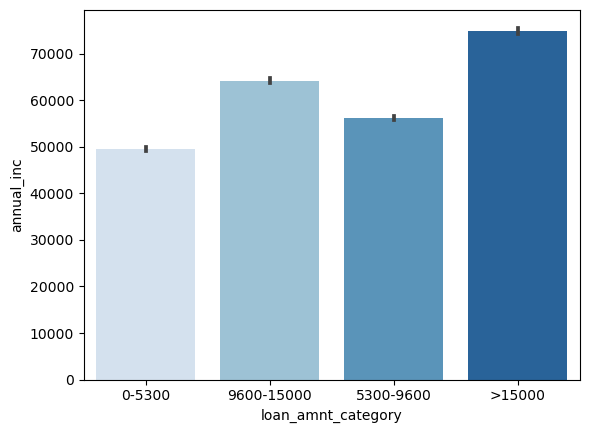

In [240]:
sns.barplot(x = 'loan_amnt_category',
            y = 'annual_inc',
            data = df,
            palette = "Blues")

### **The above plot suggests as an individual annual income increases his/her ask for loan amount also increases**

In [241]:
df['verification_status_perc'] = (df.defaulted / df.groupby('verification_status')['defaulted'].transform('count')) * 100
df.groupby(["verification_status", "loan_status"]).sum()['home_ownership_perc']

verification_status  loan_status
Not Verified         Charged Off    27.637497
                     Fully Paid      0.000000
Source Verified      Charged Off    12.579367
                     Fully Paid      0.000000
Verified             Charged Off    20.389739
                     Fully Paid      0.000000
Name: home_ownership_perc, dtype: float64

In [242]:
df.groupby(["verification_status", "loan_status"]).mean()['funded_amnt_inv']

verification_status  loan_status
Not Verified         Charged Off     7642.100424
                     Fully Paid      7735.257787
Source Verified      Charged Off     9280.867054
                     Fully Paid      8731.068190
Verified             Charged Off    13421.201291
                     Fully Paid     12845.351054
Name: funded_amnt_inv, dtype: float64

### **An individual who is not verified has a very high tendency of their loan being "Charged off"**
### **An individual who is verified is generally provided with a higher average loan amount**

loan_amnt_category
0-5300        1109
5300-9600     1055
9600-15000    1229
>15000        1113
Name: defaulted, dtype: int64

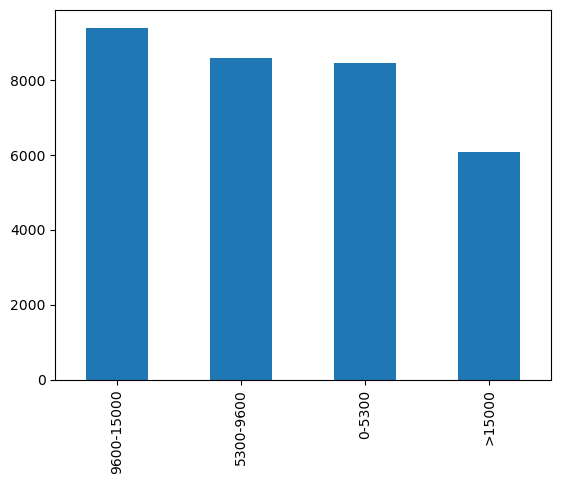

In [243]:

df.loan_amnt_category.value_counts().plot.bar()
df.groupby(["loan_amnt_category"]).sum()["defaulted"]

### **Loan amount value is inversely proportional to amount of folks asking for that particular loan amount**

In [244]:
df['annual_inc_category_perc'] = (df.defaulted / df.groupby('annual_inc_category')['defaulted'].transform('count')) * 100

df.groupby(["annual_inc_category", "loan_status"]).sum()['annual_inc_category_perc']

annual_inc_category  loan_status
0-40000              Charged Off    17.205570
                     Fully Paid      0.000000
40000-55400          Charged Off    14.592934
                     Fully Paid      0.000000
55400-75893          Charged Off    13.113544
                     Fully Paid      0.000000
>75893               Charged Off    10.352883
                     Fully Paid      0.000000
Name: annual_inc_category_perc, dtype: float64

#### **As the Annual income increases the tendency of some to default decreases**

In [245]:
df['int_rates_bucket_perc'] = (df.defaulted / df.groupby('int_rates_bucket')['defaulted'].transform('count')) * 100

df.groupby(["int_rates_bucket", "loan_status"]).sum()['int_rates_bucket_perc']

int_rates_bucket  loan_status
HIGH              Charged Off    14.629723
                  Fully Paid      0.000000
LOW               Charged Off     5.123526
                  Fully Paid      0.000000
MEDIUM            Charged Off     9.910570
                  Fully Paid      0.000000
VERY HIGH         Charged Off    23.196589
                  Fully Paid      0.000000
Name: int_rates_bucket_perc, dtype: float64

#### **The higher the Interest rates higher are the chances of an individual to default on the loan which suggests there is a higher likelihood of loan getting defaulted when loan is disbursed with higher interest rates**

In [246]:
df['issue_year_perc'] = (df.defaulted / df.groupby('issue_y')['defaulted'].transform('count')) * 100

df.groupby(["issue_y", "loan_status"]).sum()['issue_year_perc']

issue_y  loan_status
2007     Charged Off    25.000000
         Fully Paid      0.000000
2008     Charged Off    15.169661
         Fully Paid      0.000000
2009     Charged Off    12.217732
         Fully Paid      0.000000
2010     Charged Off    12.241715
         Fully Paid      0.000000
2011     Charged Off    15.127379
         Fully Paid      0.000000
Name: issue_year_perc, dtype: float64

### **2007, followed by 2008 and 2011 experienced most number of people with charged off loans, the amount of fully paid loan also increased, This is probably as after effect of recession happened**

In [247]:
df.groupby(["annual_inc_category"]).mean()["loan_amnt"]

annual_inc_category
0-40000         7050.454331
40000-55400     9628.184204
55400-75893    11166.124370
>75893         12939.146072
Name: loan_amnt, dtype: float64

945xx    446
112xx    440
606xx    436
100xx    434
070xx    379
        ... 
169xx      1
332xx      1
884xx      1
461xx      1
753xx      1
Name: zip_code, Length: 799, dtype: int64

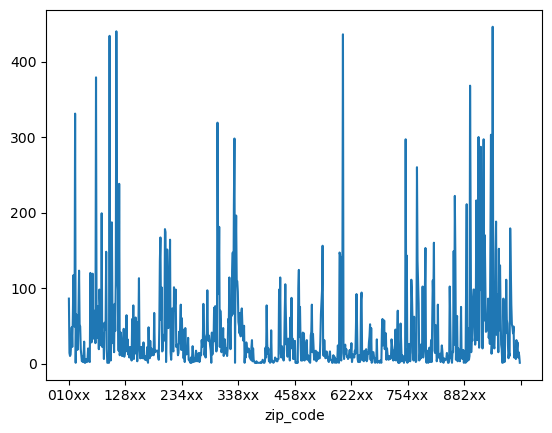

In [248]:
df.groupby(["zip_code"]).defaulted.count().plot()
df.zip_code.value_counts()

#### **Folks with zipcode ranging from 010xx-12xx, living around 338xx or 754xx, 622xx, 882xx-90xx have higher tendency of defaulting the loans**

In [249]:
df['pub_rec_bankruptcies_defaulted_perc'] = df['defaulted'] / df.groupby('pub_rec_bankruptcies')['defaulted'].transform('count')

pub_rec_bankruptcies_loan_status_group = df.groupby(["pub_rec_bankruptcies", "loan_status"]).pub_rec_bankruptcies_defaulted_perc.sum()
pub_rec_bankruptcies_loan_status_group.groupby(level=0).apply(lambda x: 100 * x) 


pub_rec_bankruptcies  loan_status
0.0                   Charged Off    13.520629
                      Fully Paid      0.000000
1.0                   Charged Off    20.958512
                      Fully Paid      0.000000
2.0                   Charged Off    40.000000
                      Fully Paid      0.000000
Name: pub_rec_bankruptcies_defaulted_perc, dtype: float64

### **As the publicly recorded bankcruptcies increases the Charge off/Defaulting percentage of an individual also increases which suggests there is a higher likelihood of loan getting defaulted when loan is disbursed to individual with higher publicly recorded bankruptices although we dont have a lot entries for individual with 2 publicly recorded bankruptcies**

In [250]:
df.groupby(["dti_bucket", "loan_status"]).defaulted.count()


dti_bucket  loan_status
HIGH        Charged Off     433
            Fully Paid     2508
LOW         Charged Off    1002
            Fully Paid     6619
MEDIUM      Charged Off     960
            Fully Paid     5666
VERY HIGH   Charged Off    1240
            Fully Paid     6630
VERY LOW    Charged Off     871
            Fully Paid     6619
Name: defaulted, dtype: int64

In [251]:
# Calculate pecentage of Charged off and fully paid grouped by Grade
df['dti_defaulted_perc'] = df['defaulted'] / df.groupby('dti_bucket')['defaulted'].transform('count')

dti_loan_status_group = df.groupby(["dti_bucket", "loan_status"]).dti_defaulted_perc.sum()
dti_loan_status_group.groupby(level=0).apply(lambda x: 100 * x) 

dti_bucket  loan_status
HIGH        Charged Off    14.722883
            Fully Paid      0.000000
LOW         Charged Off    13.147881
            Fully Paid      0.000000
MEDIUM      Charged Off    14.488379
            Fully Paid      0.000000
VERY HIGH   Charged Off    15.756036
            Fully Paid      0.000000
VERY LOW    Charged Off    11.628838
            Fully Paid      0.000000
Name: dti_defaulted_perc, dtype: float64

### **As the dti keeps on increasing the Charge off percentage which suggests there is a higher likelihood of loan getting defaulted when loan is disbursed to individual with higher dti**

In [252]:
df['grade_defaulted_perc'] = (df['defaulted'] / df.groupby(["grade", "sub_grade"])['defaulted'].transform('count'))*100

df.groupby(["grade", "sub_grade", "loan_status"]).grade_defaulted_perc.sum()

grade  sub_grade  loan_status
A      A1         Charged Off     2.383420
                  Fully Paid      0.000000
       A2         Charged Off     4.798762
                  Fully Paid      0.000000
       A3         Charged Off     5.035054
                  Fully Paid      0.000000
       A4         Charged Off     6.084868
                  Fully Paid      0.000000
       A5         Charged Off     7.885763
                  Fully Paid      0.000000
B      B1         Charged Off     8.965063
                  Fully Paid      0.000000
       B2         Charged Off    10.504933
                  Fully Paid      0.000000
       B3         Charged Off    11.799410
                  Fully Paid      0.000000
       B4         Charged Off    12.719506
                  Fully Paid      0.000000
       B5         Charged Off    13.876652
                  Fully Paid      0.000000
C      C1         Charged Off    15.340584
                  Fully Paid      0.000000
       C2         Charge

### **When grouped by grade, subgrades, It's found that as we move to lower grades the Charge off proportions keeps on increasing which suggests there is higher chance of loans being defaulted when disbursed to individual with lower employment grades**